In [1]:
# Analysing and Visualizing Data Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#**Importing Datasets**

In [2]:
%pip install ucimlrepo

In [3]:
# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

#**Printing Head**

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


#**Printing info**

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


#**Checking Nulls**

In [8]:
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
y.isnull().sum()

,0
num,0


#**Print Describtion**

In [10]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


#**Print Unique Values**

In [11]:
print("the uniqe values of thal:")
X['thal'].unique()

the uniqe values of thal:


array([ 6.,  3.,  7., nan])

In [12]:
print("the uniqe values of the cp : ")
X['cp'].unique()

the uniqe values of the cp : 


array([1, 4, 3, 2])

In [13]:
print("the uniqe values of the sex : ")
X['sex'].unique()

the uniqe values of the sex : 


array([1, 0])

In [14]:
# Changing Num to Target
y['target'] = y['num']
y.drop('num', axis=1, inplace=True)

/tmp/ipython-input-3991534162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target'] = y['num']
/tmp/ipython-input-3991534162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop('num', axis=1, inplace=True)


In [15]:
print("the uniqe values of the target : ")
y['target'].unique()

the uniqe values of the target : 


array([0, 2, 1, 3, 4])

#**Clean y Dataframe**

In [16]:
y['target'] = y['target'].apply(lambda x: 0 if x == 0 else 1)

/tmp/ipython-input-2914679641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target'] = y['target'].apply(lambda x: 0 if x == 0 else 1)


#**Analyzing Important Features**

In [17]:
countNoDisease = len(y[y.target == 0])
countHaveDisease = len(y[y.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(y.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(y.target))*100)))

Percentage of Patients Haven't Heart Disease: 54.13%
Percentage of Patients Have Heart Disease: 45.87%


#**Concatenate Data Frames**

In [18]:
df = pd.concat([X, y], axis=1, join='outer')

#**Printing Head After Cleaning**

In [19]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


#**Printing info**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


#**Checking Nulls**

In [21]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#**Fill Nulls**

In [22]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

#**Drop Duplicates**

In [23]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


#**EDA**

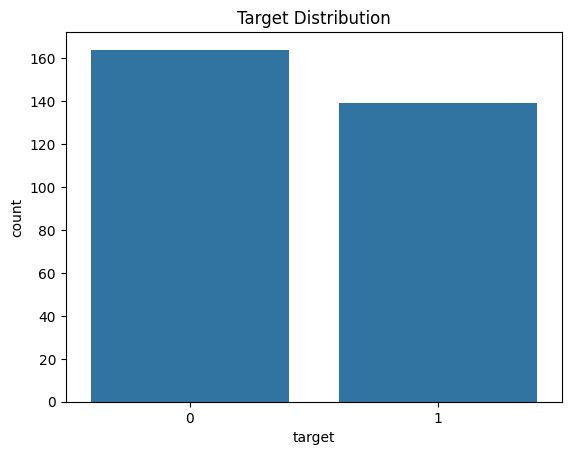

In [24]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()

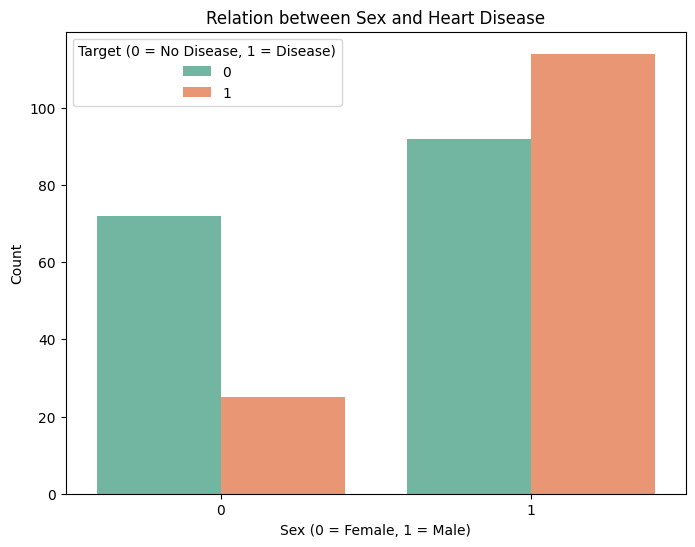

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='target', data=df, palette='Set2')
plt.title("Relation between Sex and Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Target (0 = No Disease, 1 = Disease)")
plt.show()

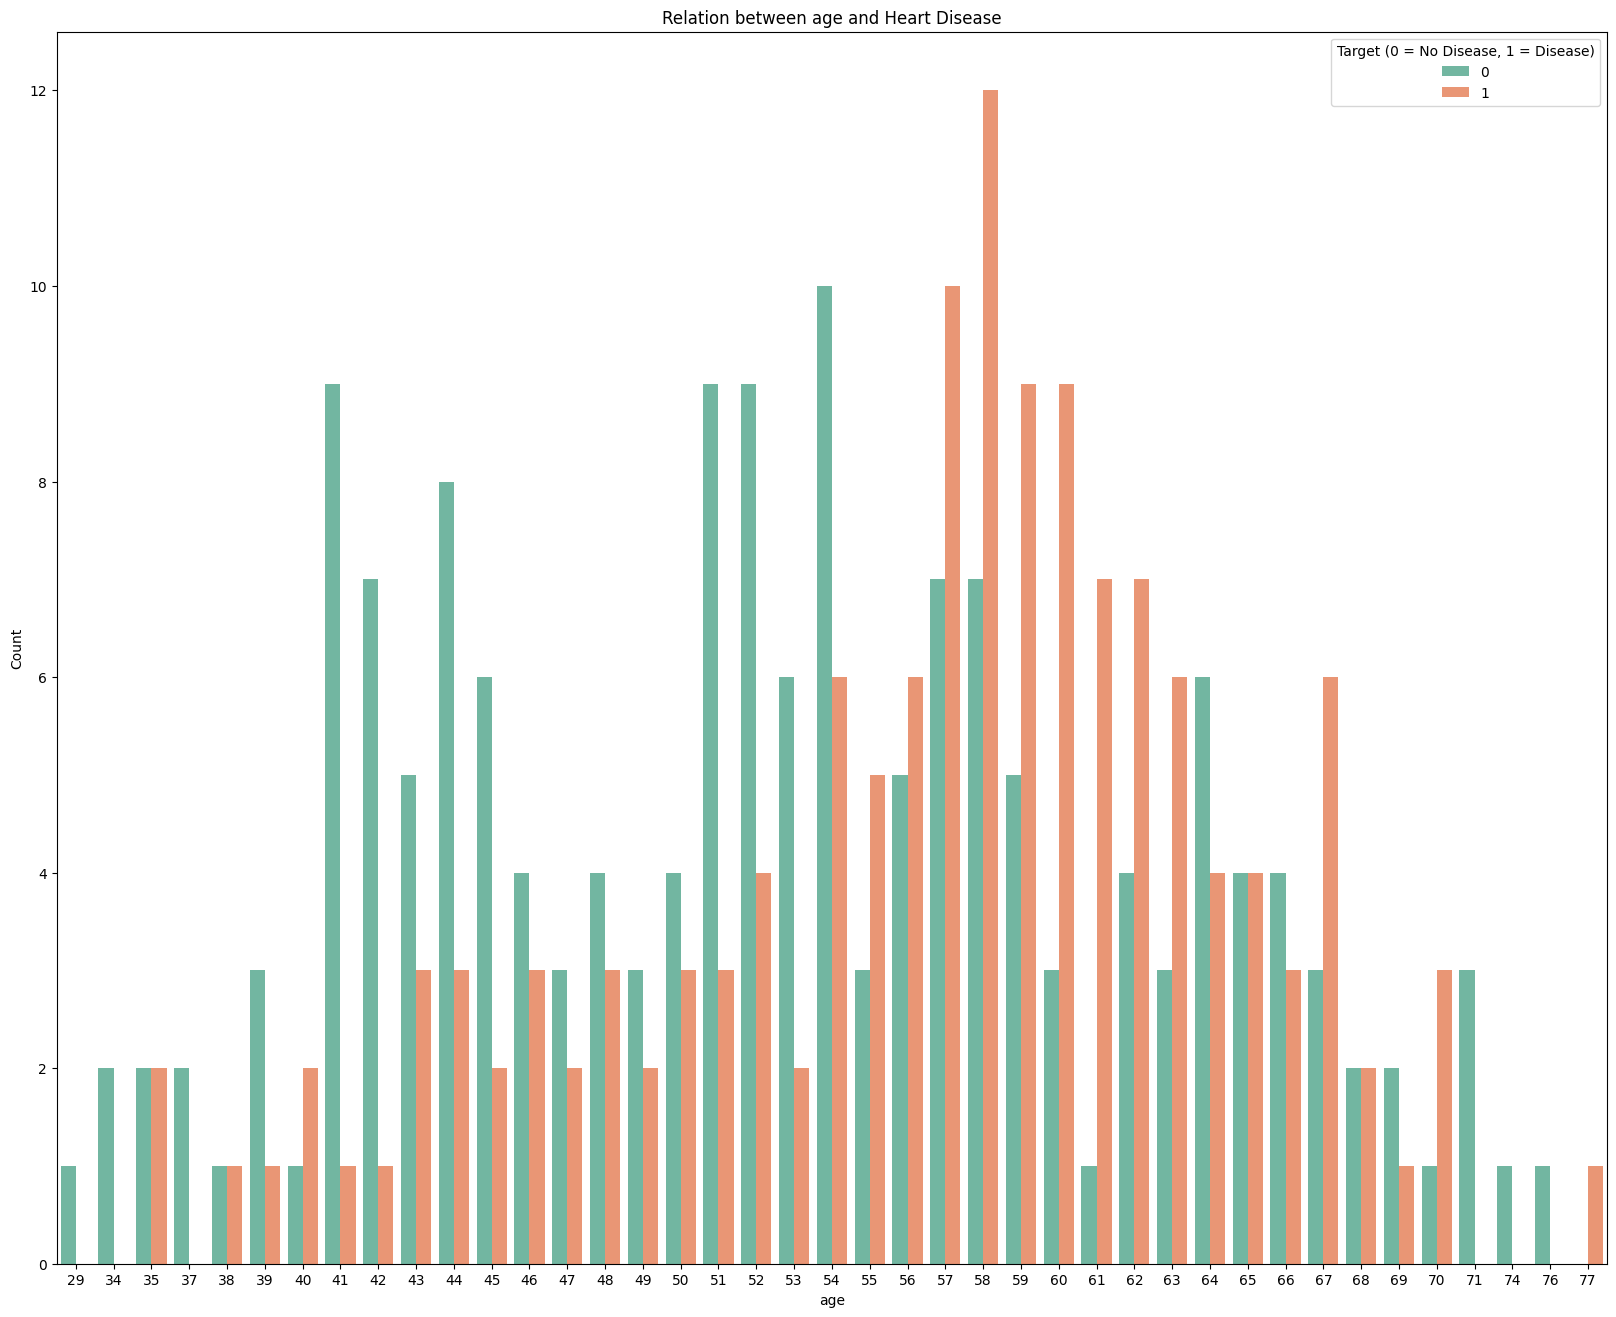

In [26]:
plt.figure(figsize=(20,16))
sns.countplot(x='age', hue='target', data=df, palette='Set2')
plt.title("Relation between age and Heart Disease")
plt.xlabel("age")
plt.ylabel("Count")
plt.legend(title="Target (0 = No Disease, 1 = Disease)")
plt.show()

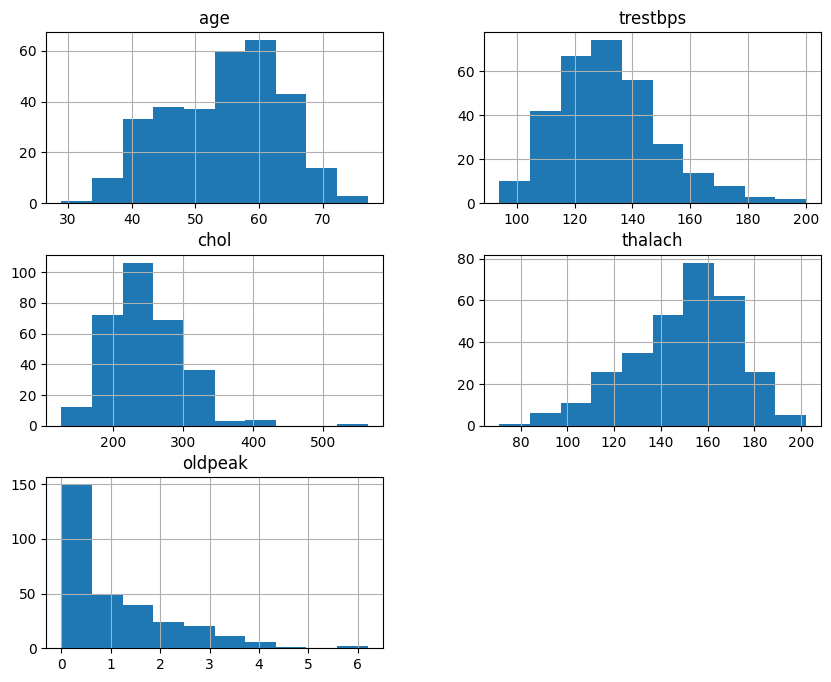

In [27]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']
df[num_cols].hist(figsize=(10,8))
plt.show()

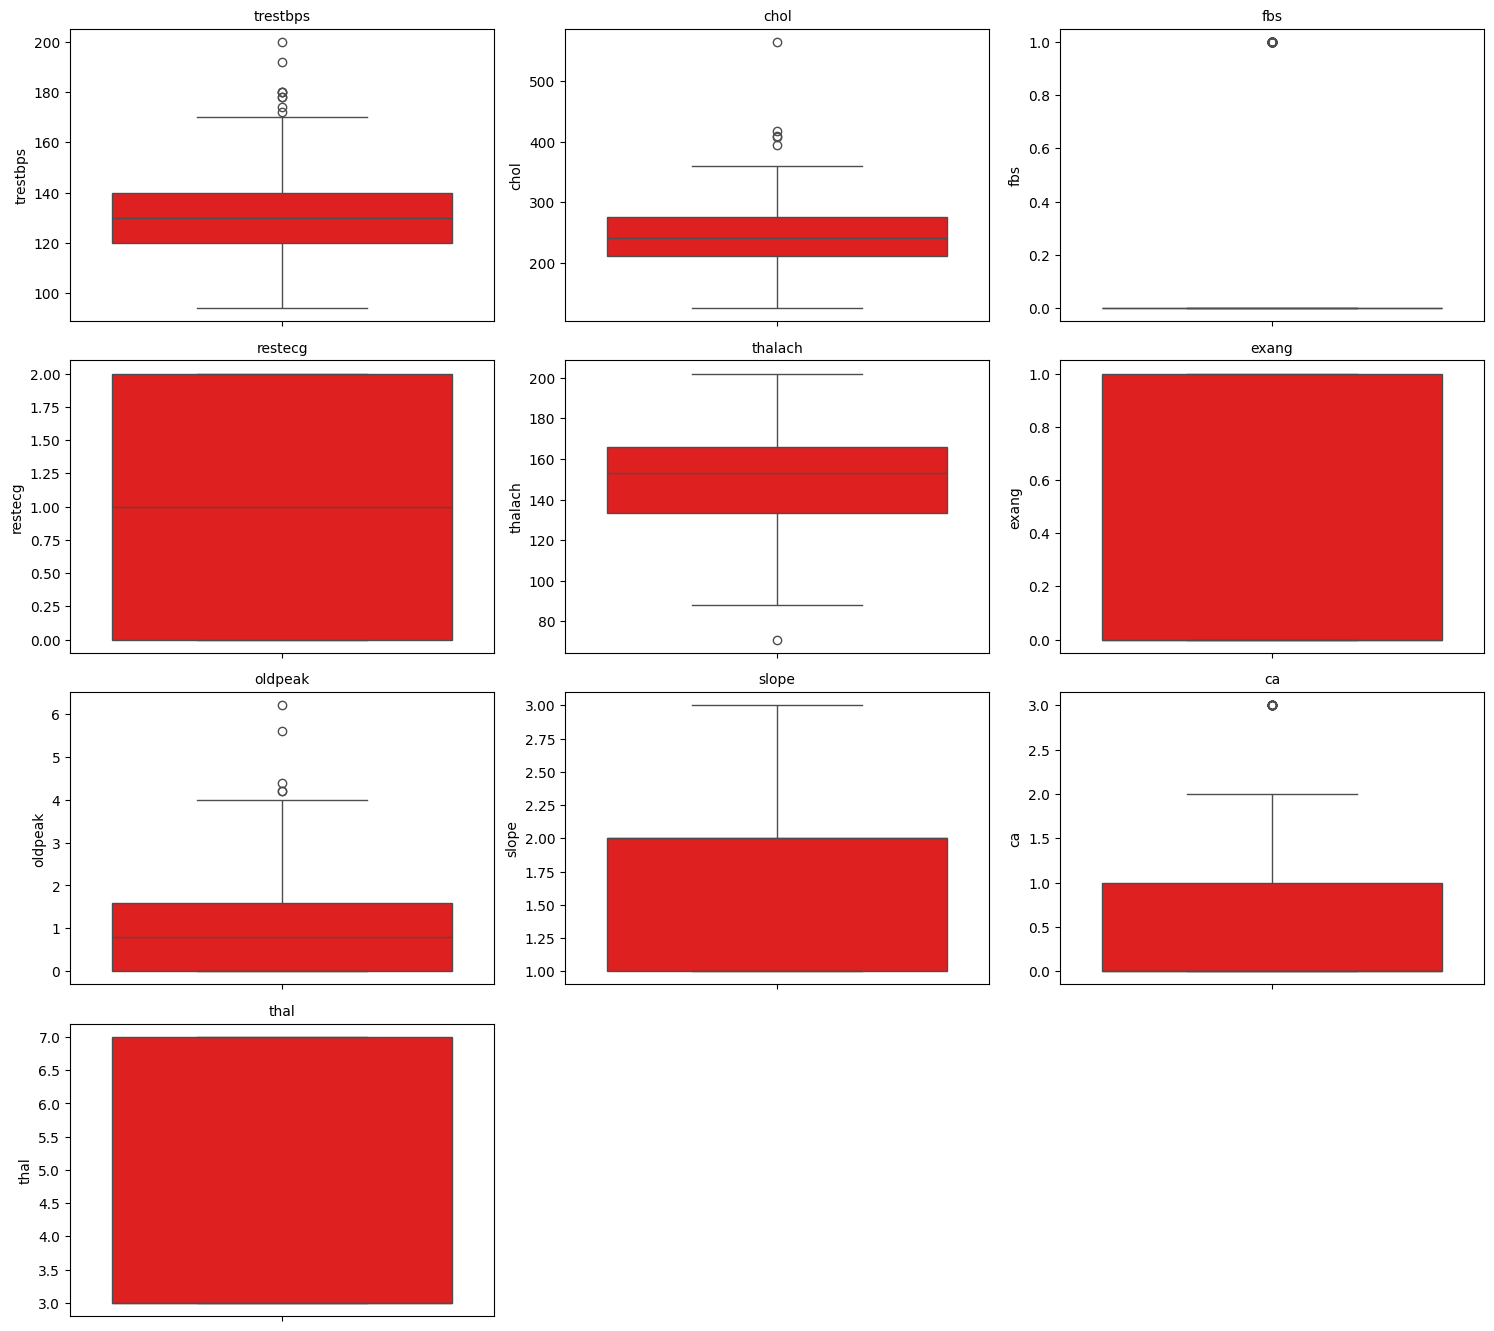

In [28]:
features = ['trestbps', 'chol', 'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope', 'ca', 'thal']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[feature], color="red")
    plt.title(feature, fontsize=10)

plt.tight_layout()
plt.show()

#**Cliping OutLiears**

In [29]:
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [30]:
outlier_columns = ['trestbps', 'chol', 'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope', 'ca', 'thal']

for col in outlier_columns:
    df = clip_outliers(df, col)

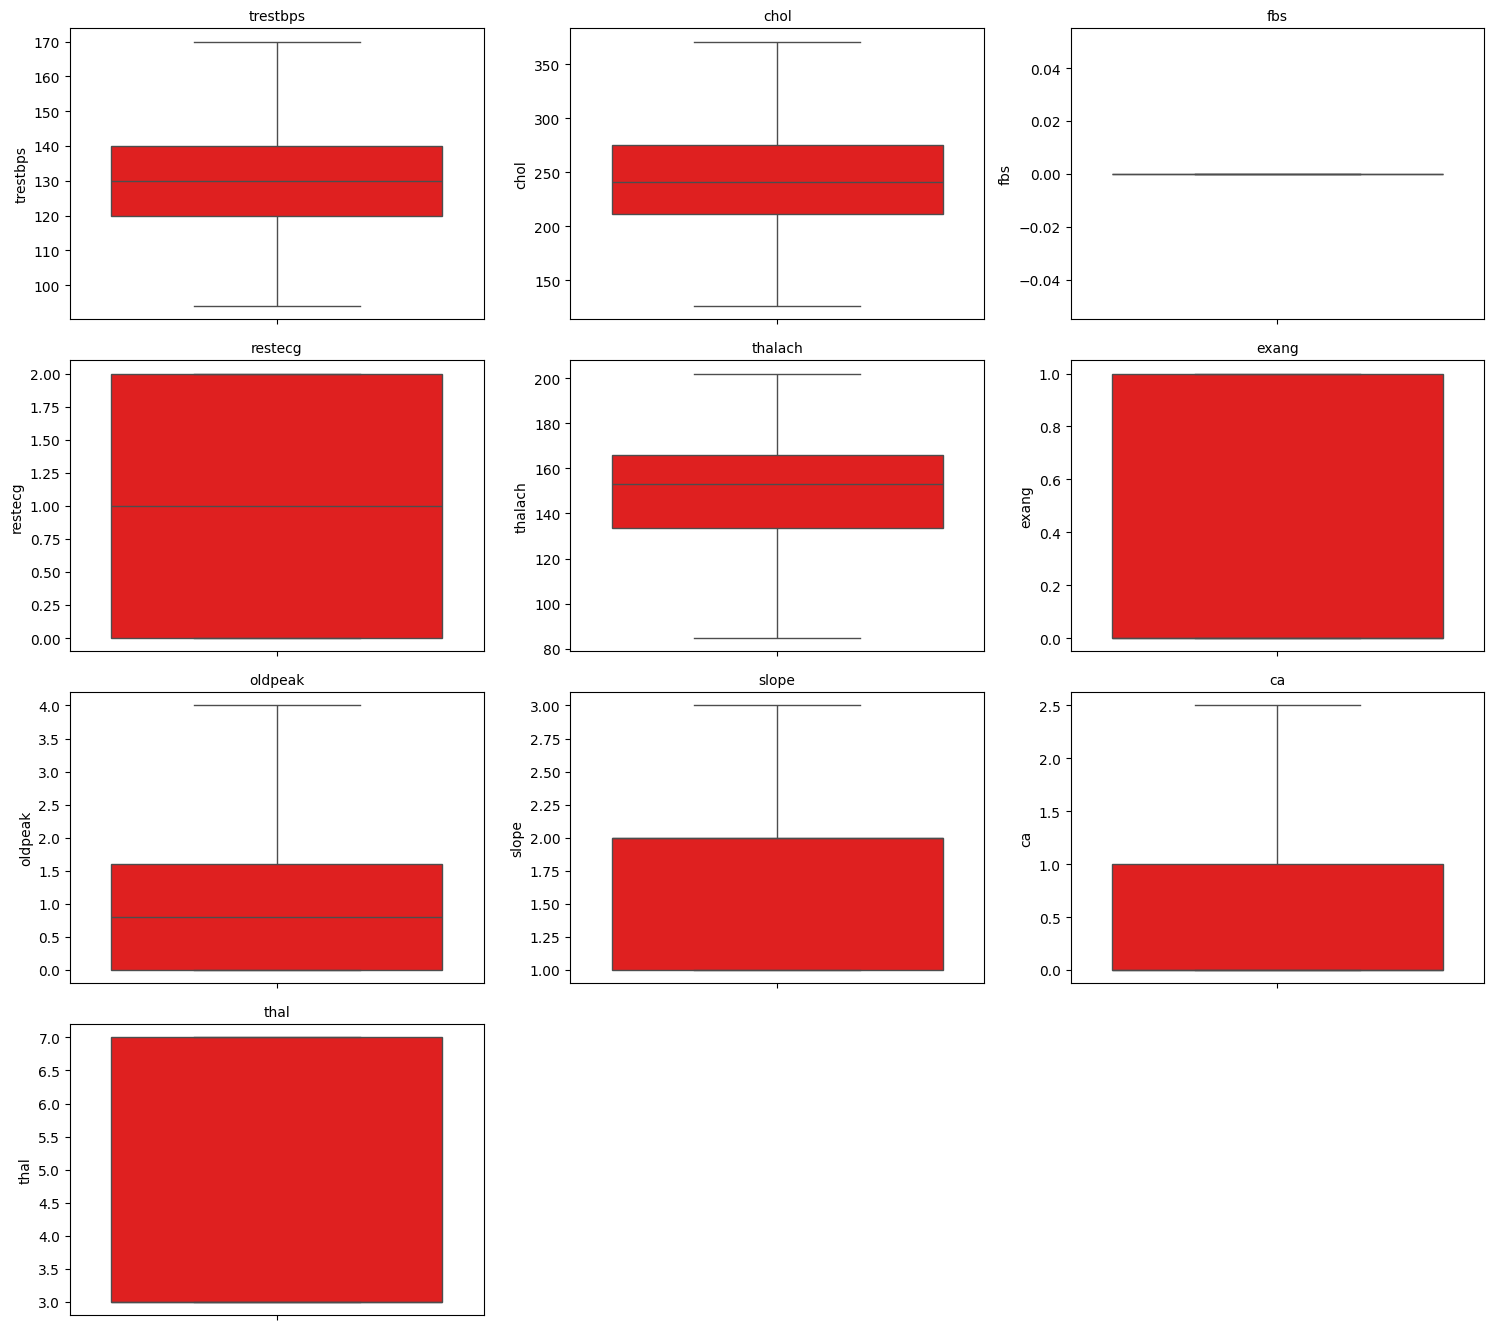

In [31]:
features = ['trestbps', 'chol', 'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope', 'ca', 'thal']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[feature], color="red")
    plt.title(feature, fontsize=10)

plt.tight_layout()
plt.show()

#**Exporting Data After Cleaning**

In [32]:
#df.to_csv("Heart_Disease_Project/data/heart_disease.csv", index=False)
df.to_csv("heart_disease.csv", index=False)